# Практика: Sberbank Russian Housing Market

Предсказание стоимости квартир [датасета Sberbank Russian Housing Market с Kaggle](https://www.kaggle.com/competitions/sberbank-russian-housing-market)
![img](https://sun9-85.userapi.com/impg/m--I02pUGPhRNqCQmfFC4443qqGmIJ0FBZIOUA/X8-HsMIm0NU.jpg?size=1403x346&quality=95&sign=b77540d88d0a5c229ace2bd123304dcd&type=album)

Описание датасета:

- price_doc: sale price (this is the target variable)
- id: transaction id
- timestamp: date of transaction
- full_sq: total area in square meters, including loggias, balconies and other non-residential areas
- life_sq: living area in square meters, excluding loggias, balconies and other non-residential areas
- floor: for apartments, floor of the building
- max_floor: number of floors in the building
- material: wall material
- build_year: year built
- num_room: number of living rooms
- kitch_sq: kitchen area
- state: apartment condition
- product_type: owner-occupier purchase or investment
- sub_area: name of the district

In [1]:
import pandas as pd

In [43]:
df = pd.read_csv('train.csv')

In [44]:
df.shape
df = df.drop(['id'], axis=1)

In [45]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


Прологарифмируем таргет, чтобы проще получать MSLE метрику, рассчитывая её как MSE с логарифмированным таргетом

MSLE является несимметричной метрикой, которая штрафует больше за недопрогноз, чем за перепрогноз. 

Так как мы решаем задачу оценки стоимости квартиры для решения о выдаче ипотеки банком, то недопредсказания стоимости будут более нежелательны.

In [46]:
import numpy as np

df = df.assign(log_price_doc = np.log1p(df['price_doc']))
df = df.drop(['price_doc'], axis=1)

In [47]:
numeric_columns = df.loc[:, df.dtypes!=np.object].columns

df.describe()

C:\Users\user\AppData\Local\Temp\ipykernel_13764\4056233333.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_columns = df.loc[:, df.dtypes!=np.object].columns


,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,log_price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,15.609483
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,0.604574
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.512935
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,15.371548
50%,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,15.651990
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,1.803644e+07,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,15.931766
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,18.526041


In [48]:
# Заполняем пропуски в числовых колонках средним значением

for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

In [49]:
df[numeric_columns].isna().any().any()

False

In [50]:
df[numeric_columns].corr()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,log_price_doc
full_sq,1.000000,0.153837,0.089450,0.057390,0.015820,-0.002532,0.334760,0.009640,-0.038544,0.056303,...,0.039083,0.040059,0.043560,0.026895,0.028579,0.021568,0.030218,0.001580,-0.041254,0.271408
life_sq,0.153837,1.000000,0.038603,0.034483,0.010200,-0.002324,0.169211,0.000651,-0.058546,0.043262,...,0.024240,0.026800,0.029921,0.014980,0.015187,0.008870,0.019099,-0.012124,-0.043462,0.119971
floor,0.089450,0.038603,1.000000,0.373873,-0.007439,0.000855,-0.004654,-0.006957,-0.083337,-0.019321,...,-0.034680,-0.029541,-0.022228,-0.044265,-0.045475,-0.012222,-0.044093,-0.101769,-0.123534,0.117870
max_floor,0.057390,0.034483,0.373873,1.000000,0.045915,-0.000215,-0.014220,0.020345,-0.061203,-0.079591,...,-0.033935,-0.028423,-0.024940,-0.040653,-0.040605,-0.048229,-0.040977,-0.083772,-0.094960,0.078692
material,0.015820,0.010200,-0.007439,0.045915,1.000000,-0.004029,-0.026924,0.038747,-0.031320,0.001012,...,0.042947,0.036865,0.037508,0.032432,0.037626,0.041689,0.037472,0.082620,0.063992,0.011807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mosque_count_5000,0.021568,0.008870,-0.012222,-0.048229,0.041689,0.014699,0.051980,0.010915,0.068570,-0.086786,...,0.529434,0.492859,0.481481,0.502028,0.550342,1.000000,0.499376,0.518500,0.242078,0.130745
leisure_count_5000,0.030218,0.019099,-0.044093,-0.040977,0.037472,-0.000601,0.049396,-0.005270,-0.002915,-0.195067,...,0.986206,0.975462,0.948391,0.969029,0.975259,0.499376,1.000000,0.809169,0.463053,0.134175
sport_count_5000,0.001580,-0.012124,-0.101769,-0.083772,0.082620,0.004257,0.075427,0.014149,0.143328,-0.416222,...,0.824139,0.778770,0.753384,0.825883,0.847771,0.518500,0.809169,1.000000,0.733897,0.223386
market_count_5000,-0.041254,-0.043462,-0.123534,-0.094960,0.063992,0.005333,0.051672,0.022122,0.203451,-0.449849,...,0.432265,0.380154,0.353270,0.482547,0.514344,0.242078,0.463053,0.733897,1.000000,0.162569


In [51]:
# Смотрим на корреляцию между признаками и выводим топ-50 самых скоррелированных признаков

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 50))

Top Absolute Correlations
railroad_station_walk_km              railroad_station_walk_min                1.000000
public_transport_station_km           public_transport_station_min_walk        1.000000
children_school                       7_14_all                                 1.000000
children_preschool                    0_6_all                                  1.000000
metro_min_walk                        metro_km_walk                            1.000000
raion_build_count_with_material_info  raion_build_count_with_builddate_info    0.999990
young_all                             0_13_all                                 0.999885
young_female                          0_13_female                              0.999871
young_male                            0_13_male                                0.999861
full_all                              female_f                                 0.999850
                                      male_f                                   0.999788
young_

In [52]:
### Удалим колонки, где корреляция оказывается > 0.9

def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname]
    
correlation(df, 0.9)

# Перезапишем список числовых колонок
numeric_columns = df.loc[:, df.dtypes!=np.object].columns

C:\Users\user\AppData\Local\Temp\ipykernel_13764\1291826042.py:17: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_columns = df.loc[:, df.dtypes!=np.object].columns


In [53]:
df.shape

(30471, 157)

In [54]:
# Проверяем признаки на наличие константных или квазиконстантных 

from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])
constant_cols = [x for x in numeric_columns if x not in cutter.get_feature_names_out()]

df[constant_cols]

,green_zone_part,indust_part,green_zone_km,cafe_count_500_price_high,mosque_count_500,mosque_count_1000,mosque_count_1500,mosque_count_2000
0,0.189727,0.000070,0.600973,0,0,0,0,0
1,0.372602,0.049637,0.065321,0,0,0,0,0
2,0.112560,0.118537,0.453172,0,0,0,0,0
3,0.194703,0.069753,0.106125,0,0,0,0,0
4,0.015234,0.037316,0.236214,0,0,0,0,0
...,...,...,...,...,...,...,...,...
30466,0.096270,0.300323,0.139814,0,0,0,0,1
30467,0.065444,0.000078,0.271861,0,0,0,0,0
30468,0.496315,0.007122,0.427248,0,0,0,0,0
30469,0.167526,0.093443,0.227547,0,0,0,0,0


Хотя признаки `green_zone_part`, `indust_part`, `green_zone_km` имеют маленькую дисперсию, так как значения внутри признаков имеют маленький порядок (меньше единицы), но не являются квазиконстантными. 

Остальные признаки являются бинарными, что тоже говорит о малой изменчивости значений, но не значит, что признак несет в себе мало информации.

In [55]:
categorical_columns = df.loc[:, df.dtypes==np.object].columns

df.describe(include='object')

C:\Users\user\AppData\Local\Temp\ipykernel_13764\2117686064.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = df.loc[:, df.dtypes==np.object].columns


,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,1161,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,2014-12-16,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,160,19448,1776,28543,28817,28155,30175,19600,29335,27649,29608,27427,28134,29690,29578,8018


In [56]:
# Закодируем категориальные признаки используя one-hot encoding для признаков с мощностью множества значений < 5
# и mean-target encoding для остальных

for col in categorical_columns:
    if col != 'timestamp':
        if df[col].nunique() < 5:
            one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)
            
        else:
            mean_target = df.groupby(col)['log_price_doc'].mean()
            df[col] = df[col].map(mean_target)

In [57]:
df

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,incineration_raion_yes,oil_chemistry_raion_yes,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes
0,2011-08-20,43,27.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,0,0
1,2011-08-23,34,19.000000,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,0,0
2,2011-08-27,43,29.000000,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,1,0,0,0,0,0,0,0
3,2011-09-01,89,50.000000,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,0,0
4,2011-09-05,77,77.000000,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2015-06-30,44,27.000000,7.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,...,1,0,1,0,0,0,0,0,0,0
30467,2015-06-30,86,59.000000,3.0,9.000000,2.000000,1935.000000,4.000000,10.000000,3.000000,...,0,0,1,1,0,0,1,0,0,0
30468,2015-06-30,45,34.403271,10.0,20.000000,1.000000,3068.057097,1.000000,1.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
30469,2015-06-30,64,32.000000,5.0,15.000000,1.000000,2003.000000,2.000000,11.000000,2.000000,...,0,0,1,0,0,0,0,0,0,0


In [58]:
# выделим временные признаки из timestamp

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['month'] = df.timestamp.dt.month
df['year'] = df.timestamp.dt.year

In [59]:
df = df.sort_values('timestamp')

In [60]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,radiation_raion_yes,railroad_terminal_raion_yes,big_market_raion_yes,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,8,2011
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,8,2011
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,1,0,0,0,0,0,0,0,8,2011
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,0,0,0,9,2011
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,1,1,0,0,0,0,0,1,9,2011


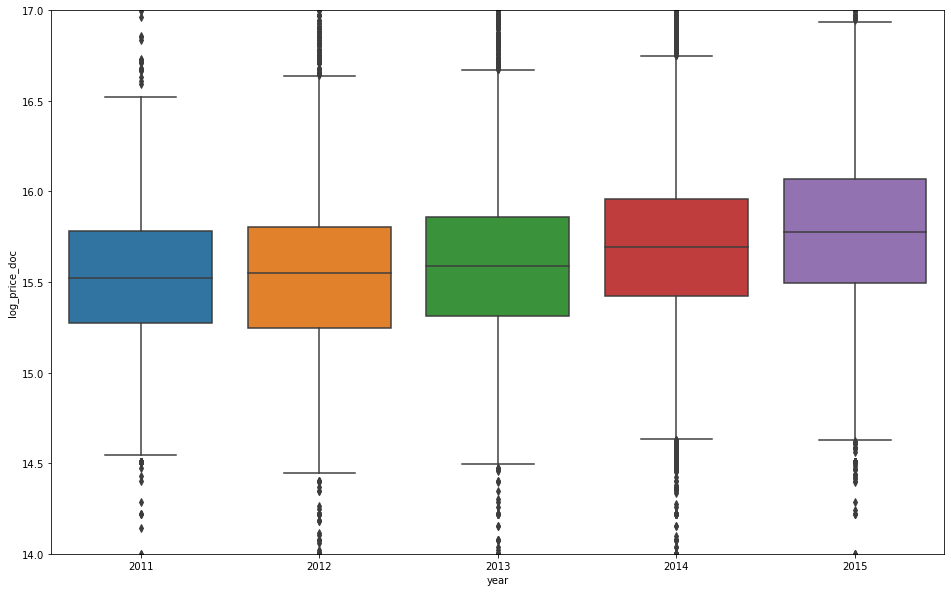

In [61]:
# Посмотрим на распределение таргета по годам

import  matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.boxplot(y='log_price_doc', x=df['year'].astype('category'), data=df)
plt.ylim((14,17))
plt.show()

In [62]:
# Как видно из boxplots, year - полезный признак, оставим его для обучения модели и закодируем через ohe-hot encoding

one_hot = pd.get_dummies(df['year'], prefix='year', drop_first=True)
df = pd.concat((df.drop(['year'], axis=1), one_hot), axis=1)

In [63]:
df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,nuclear_reactor_raion_yes,detention_facility_raion_yes,water_1line_yes,big_road1_1line_yes,railroad_1line_yes,month,year_2012,year_2013,year_2014,year_2015
0,2011-08-20,43,27.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,8,0,0,0,0
1,2011-08-23,34,19.0,3.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,8,0,0,0,0
2,2011-08-27,43,29.0,2.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,8,0,0,0,0
3,2011-09-01,89,50.0,9.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,0,9,0,0,0,0
4,2011-09-05,77,77.0,4.0,12.558974,1.827121,3068.057097,1.909804,6.399301,2.107025,...,0,0,0,0,1,9,0,0,0,0


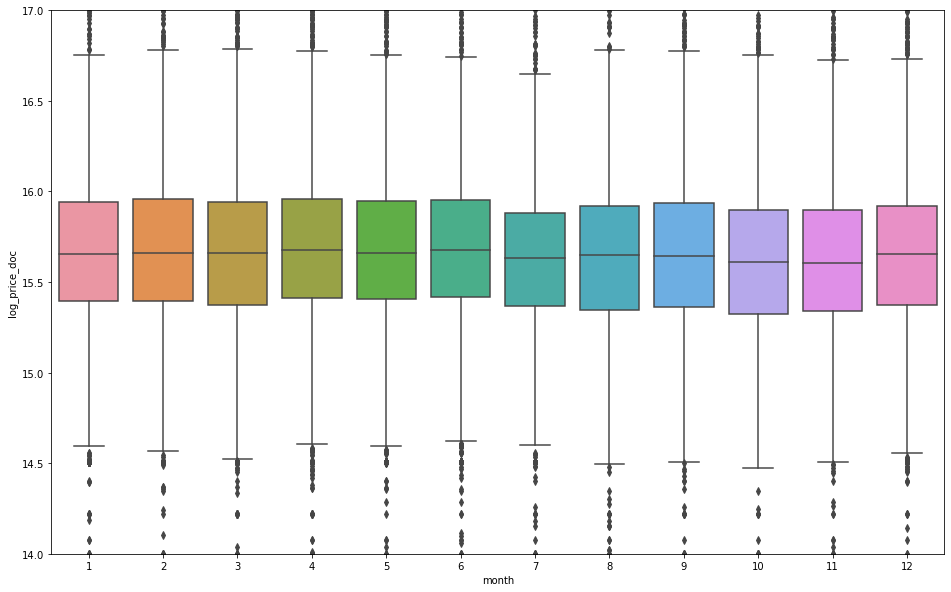

In [64]:
# Посмотрим на распределение таргета по месяцам года

fig = plt.figure()
fig.set_size_inches(16, 10)


sns.boxplot(y='log_price_doc', x=df['month'].astype('category'), data=df)
plt.ylim((14,17))
plt.show()

In [65]:
# оставим признак month для обучения модели и закодируем через ohe-hot encoding

one_hot = pd.get_dummies(df['month'], prefix='month', drop_first=True)
df = pd.concat((df.drop(['month'], axis=1), one_hot), axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


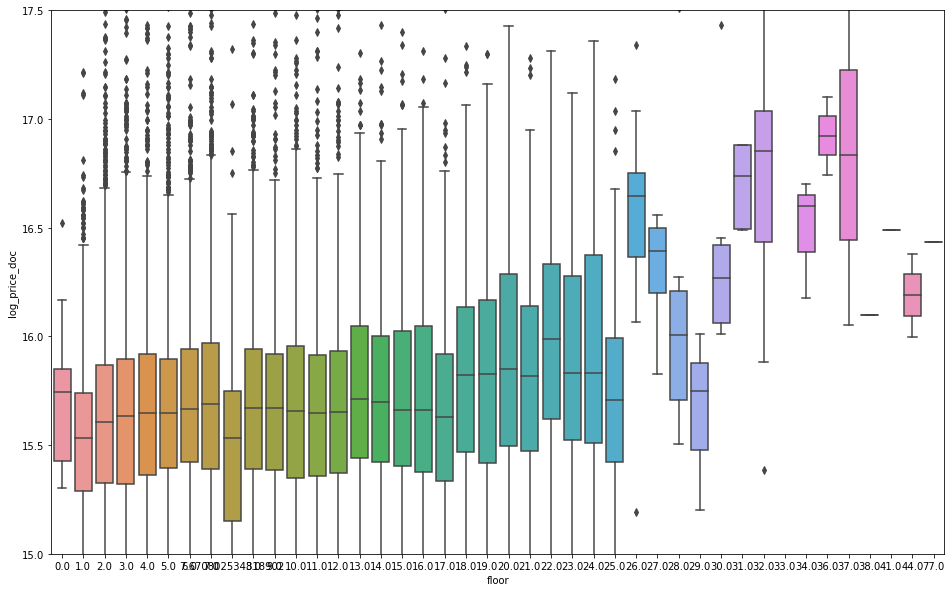

In [66]:
# Посмотрим на распределение таргета в зависимости от floor

fig = plt.figure()
fig.set_size_inches(16, 10)


sns.boxplot(y='log_price_doc', x=df['floor'].astype('category'), data=df)
plt.ylim((15,17.5))
plt.show()

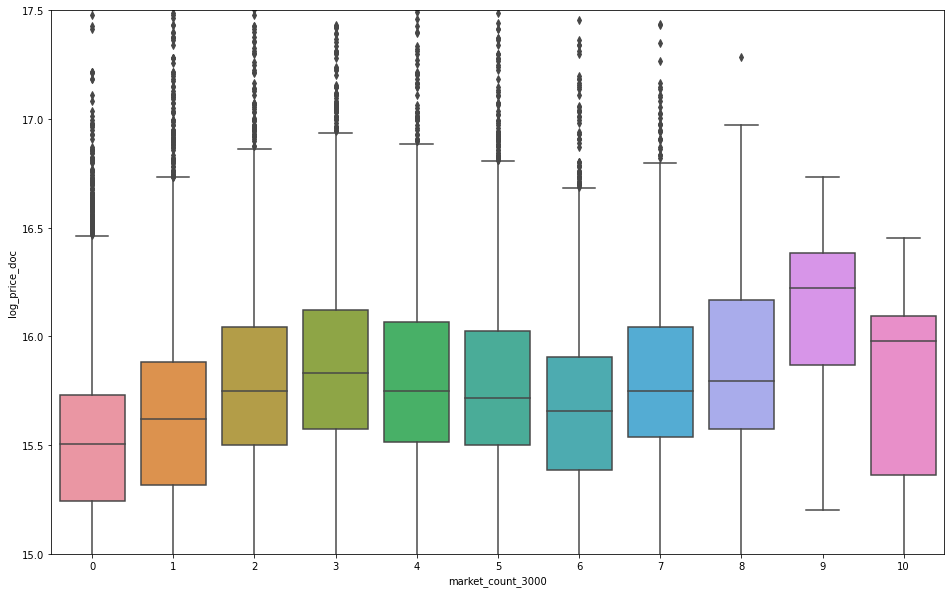

In [67]:
# Посмотрим на распределение таргета в зависимости от market_count_3000

fig = plt.figure()
fig.set_size_inches(16, 10)


sns.boxplot(y='log_price_doc', x=df['market_count_3000'].astype('category'), data=df)
plt.ylim((15,17.5))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


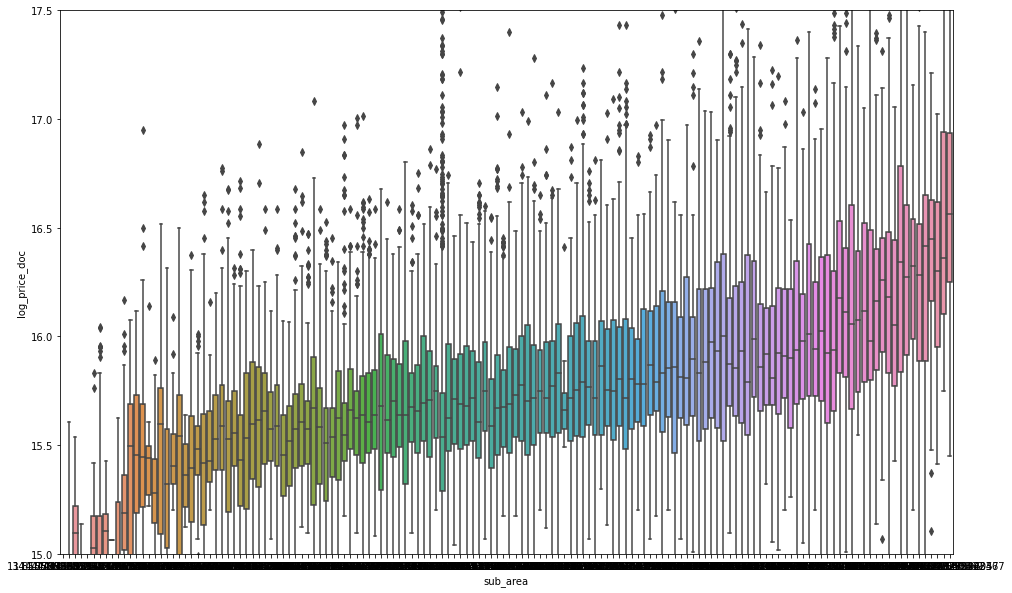

In [68]:
# Посмотрим на распределение таргета в зависимости от sub_area

fig = plt.figure()
fig.set_size_inches(16, 10)


sns.boxplot(y='log_price_doc', x=df['sub_area'].astype('category'), data=df)
plt.ylim((15,17.5))
plt.show()

In [69]:
df = df.drop('timestamp', axis=1)

In [70]:
# Очистим данные от выбросов

top_quantile = df['log_price_doc'].quantile(0.975)
low_quantile = df['log_price_doc'].quantile(0.025)

df = df[(df['log_price_doc'] > low_quantile) & (df['log_price_doc'] < top_quantile)]

In [71]:
X = df.drop('log_price_doc', axis=1)
Y = df['log_price_doc']

In [73]:
# Обучим линейную регрессию используя TimeSeriesSplit валидацию

from sklearn.model_selection import cross_validate, TimeSeriesSplit
from sklearn.linear_model import LinearRegression

splitter = TimeSeriesSplit(n_splits=4)

model = LinearRegression()

cv_results = cross_validate(model, X, Y, cv=splitter, scoring='neg_mean_squared_error', return_train_score=True)

test_cross_val_error = np.mean(cv_results['test_score'])
train_cross_val_error = np.mean(cv_results['train_score'])

print(f"MSLE на Кросс-валидации на трейне: {-round(train_cross_val_error, 3)}")
print(f"MSLE на Кросс-валидации на тесте: {-round(test_cross_val_error, 3)}")

MSLE на Кросс-валидации на трейне: 0.14
MSLE на Кросс-валидации на тесте: 0.22


In [113]:
# Обучим Lasso-регрессию используя TimeSeriesSplit валидацию

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge

pipe_lasso = Pipeline([('scaler', StandardScaler()), ('Lasso', Lasso(max_iter=100000))])


cv_results = cross_validate(pipe_lasso, X, Y, cv=splitter, scoring='neg_mean_squared_error', return_train_score=True, )

test_cross_val_error = np.mean(cv_results['test_score'])
train_cross_val_error = np.mean(cv_results['train_score'])

print(f"MSLE на Кросс-валидации на трейне: {-round(train_cross_val_error, 3)}")
print(f"MSLE на Кросс-валидации на тесте: {-round(test_cross_val_error, 3)}")

MSLE на Кросс-валидации на трейне: 0.209
MSLE на Кросс-валидации на тесте: 0.218


In [114]:
# Обучим Ridge-регрессию используя TimeSeriesSplit валидацию

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge

pipe_ridge = Pipeline([('scaler', StandardScaler()), ('Ridge', Ridge())])


cv_results = cross_validate(pipe_ridge, X, Y, cv=splitter, scoring='neg_mean_squared_error', return_train_score=True, )

test_cross_val_error = np.mean(cv_results['test_score'])
train_cross_val_error = np.mean(cv_results['train_score'])

print(f"MSLE на Кросс-валидации на трейне: {-round(train_cross_val_error, 3)}")
print(f"MSLE на Кросс-валидации на тесте: {-round(test_cross_val_error, 3)}")

MSLE на Кросс-валидации на трейне: 0.14
MSLE на Кросс-валидации на тесте: 0.22


In [108]:
alphas = np.linspace(start=0.01, stop=1, num=30)
alphas

array([0.01      , 0.04413793, 0.07827586, 0.11241379, 0.14655172,
       0.18068966, 0.21482759, 0.24896552, 0.28310345, 0.31724138,
       0.35137931, 0.38551724, 0.41965517, 0.4537931 , 0.48793103,
       0.52206897, 0.5562069 , 0.59034483, 0.62448276, 0.65862069,
       0.69275862, 0.72689655, 0.76103448, 0.79517241, 0.82931034,
       0.86344828, 0.89758621, 0.93172414, 0.96586207, 1.        ])

In [116]:
# Повалидируемся по параметру регуляризации Ridge-регрессии

from sklearn.model_selection import GridSearchCV

param_grid = {'Ridge__alpha' : alphas}

search = GridSearchCV(pipe_ridge, param_grid, cv=splitter, scoring='neg_mean_squared_error')

search.fit(X, Y)

print(f'Best params (CV_score={search.best_score_:.5f})')
print(search.best_params_)

Best params (CV_score=-0.21959)
{'Ridge__alpha': 1.0}


## Сегментация данных

`product_type_OwnerOccupier` - бинарный признак, который показывает на первичном или вторичном рынке продается квартира.

Новое и вторичное жилье имеют большую разницу в цене. 

Попробую построить разные модели для этих групп данных и проверить качество.

In [117]:
Owner_Occupier = df[df['product_type_OwnerOccupier'] == 1].copy()
Investment = df[df['product_type_OwnerOccupier'] == 0].copy()

In [118]:
X_Occupier = Owner_Occupier.drop('log_price_doc', axis=1)
Y_Occupier = Owner_Occupier['log_price_doc']

X_Investment = Investment.drop('log_price_doc', axis=1)
Y_Investment = Investment['log_price_doc']

In [119]:
pipe_lasso.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'Lasso', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'Lasso__alpha', 'Lasso__copy_X', 'Lasso__fit_intercept', 'Lasso__max_iter', 'Lasso__normalize', 'Lasso__positive', 'Lasso__precompute', 'Lasso__random_state', 'Lasso__selection', 'Lasso__tol', 'Lasso__warm_start'])

In [121]:
### Соберем модель для Owner_Occupier

param_grid = {'Lasso__alpha' : alphas}

search_Owner_Occupier = GridSearchCV(pipe_lasso, param_grid, 
                                     cv=splitter, scoring='neg_mean_squared_error')

search_Owner_Occupier.fit(X_Occupier, Y_Occupier)

print(f"Best parameter (CV score={search_Owner_Occupier.best_score_:.5f}):")
print(search_Owner_Occupier.best_params_)

pipe_lasso.set_params(Lasso__alpha=search_Owner_Occupier.best_params_['Lasso__alpha'])

cv_result_pipe = cross_validate(pipe_lasso, X_Occupier, Y_Occupier, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

error_Occupier_train = -np.mean(cv_result_pipe['train_score'])
error_Occupier_test = -np.mean(cv_result_pipe['test_score'])

print(f"Среднее MSLE на тренировочных фолдах: {error_Occupier_train.round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {error_Occupier_test.round(3)}")

Best parameter (CV score=-0.08234):
{'Lasso__alpha': 0.04413793103448276}
Среднее MSLE на тренировочных фолдах: 0.072
Среднее MSLE на тестовых фолдах: 0.082


In [128]:
### Соберем модель для Investment

search_Investment = GridSearchCV(pipe_lasso, param_grid, 
                                cv=splitter, scoring='neg_mean_squared_error')

search_Investment.fit(X_Investment, Y_Investment)

print(f"Best parameter (CV score={search_Investment.best_score_:.5f}):")
print(search_Investment.best_params_)

pipe_lasso.set_params(Lasso__alpha=search_Investment.best_params_['Lasso__alpha'])

cv_result_pipe = cross_validate(pipe_lasso, X_Investment, Y_Investment, 
                                scoring='neg_mean_squared_error',
                                cv=splitter, return_train_score=True)

error_Investment_train = -np.mean(cv_result_pipe['train_score'])
error_Investment_test = -np.mean(cv_result_pipe['test_score'])

print(f"Среднее MSLE на тренировочных фолдах: {error_Investment_train.round(3)}")
print(f"Среднее MSLE на тестовых фолдах: {error_Investment_test.round(3)}")

Best parameter (CV score=-0.17548):
{'Lasso__alpha': 0.01}
Среднее MSLE на тренировочных фолдах: 0.181
Среднее MSLE на тестовых фолдах: 0.175


In [131]:
### Перевзвесим скоры с учетом количества объектов
### в обоих типах жилья

n_Occupier = Owner_Occupier.shape[0]
n_Investment = Investment.shape[0] 

## Посчитаем доли категорий в общий выборке 

share_Occupier = n_Occupier / df.shape[0]
share_Investment = n_Investment / df.shape[0]

weighted_error_train = share_Occupier * error_Occupier_train + \
                       share_Investment * error_Investment_train

weighted_error_test = share_Occupier * error_Occupier_test + \
                       share_Investment * error_Investment_test

print(f"Среднее взвешенное MSLE на тренировочных фолдах: {weighted_error_train.round(3)}")
print(f"Среднее взвешенное MSLE на тестовых фолдах: {weighted_error_test.round(3)}")

Среднее взвешенное MSLE на тренировочных фолдах: 0.14
Среднее взвешенное MSLE на тестовых фолдах: 0.14


Как еще можно улучшить модель?

- Обучить другие модели
- Добавить макропоказатели в датасет
- Сгенерировать новые фичи из уже имеющихся
- Провести более глубокий EDA анализ